In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, OrderedDict
from simulator import get_simulator
from simulate import simulate
from simulate import mpi_simulate

In [2]:
system = {
    'duration': 800.0, 
    'resolution': 20.0,
    'species': [
        ('x1', 10), 
        ('x2', 10), 
    ],
    'reactions': [
        ('lambda1', (), ((1, 'x1'), )), 
        ('lambda2', (), ((1, 'x2'), )), 
        ('g', ((1, 'x1'), ), ()), 
        ('g', ((1, 'x2'), ), ()), 
        ('gamma', ((1, 'x1'), ), ()), 
        ('gamma', ((1, 'x2'), ), ()), 
    ], 
    'variables': [
        ('lambda1', 5.0), 
        ('lambda2', 5.0), 
        ('mu', 10.0), 
        ('epsilon', 0.00001), 
        ('gamma', 0.01), 
    ], 
    'functions': [
        ('g', 'mu / (epsilon + x1 + x2)'),
    ], 
    'targets': [
        'time', 
        'x1', 
        'x2', 
    ],
}

ext module version: gillespie_0 0
Compiling ./gillespie_0.pyx because it changed.
[1/1] Cythonizing ./gillespie_0.pyx
running clean
removing 'build/temp.linux-x86_64-3.6' (and everything under it)
removing 'build'
running build_ext
building 'gillespie_0' extension
creating build/temp.linux-x86_64-3.6
gcc -pthread -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/srv/cluster/anaconda3/lib/python3.6/site-packages/numpy/core/include -I/srv/cluster/anaconda3/include/python3.6m -c ./gillespie_0.c -o build/temp.linux-x86_64-3.6/./gillespie_0.o
gcc -pthread -shared -L/srv/cluster/anaconda3/lib -Wl,-rpath=/srv/cluster/anaconda3/lib,--no-as-needed build/temp.linux-x86_64-3.6/./gillespie_0.o -L/srv/cluster/anaconda3/lib -lpython3.6m -o /srv/cluster/mini_gillespiem/.simulators/gillespie_0.cpython-36m-x86_64-linux-gnu.so


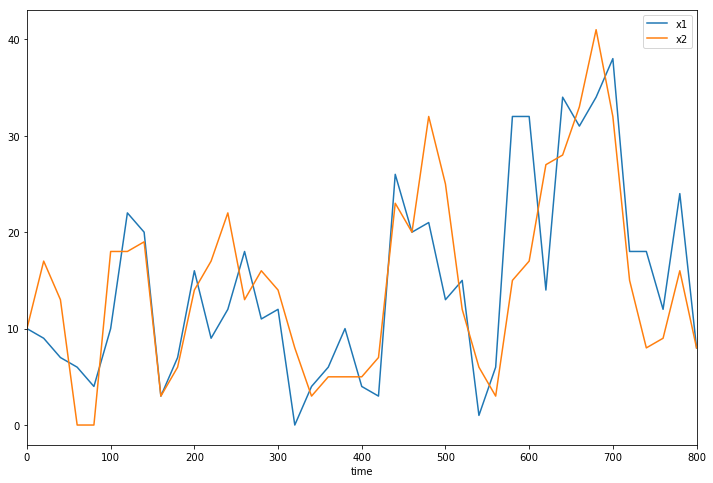

In [3]:
location = {'lambda1': 5.0, 'lambda2': 5.0}
df = pd.DataFrame(OrderedDict((t, d) for t, d in zip(system['targets'], get_simulator(system)(2, **location))))
df.plot(x='time', y=['x1', 'x2'], kind='line', figsize=(12, 8))

In [4]:
from correlation import steady_state_correlation
from pscan import pscan_view

processing = (
    (steady_state_correlation, ('x1', 'x2')), 
)

axes = (
    ('lambda1', np.arange(1.0, 10.0 + 1.0, 1.0)),
    ('lambda2', np.arange(1.0, 10.0 + 1.0, 1.0)),
)

pspace, pscans = mpi_simulate(system, processing=processing, batchsize=1000, axes=axes, hostfile='~/dev/hostfile')

Scanning Parameters:   0%|          | 0/100 [00:00<?, ?it/s]

worker 2 start
worker 4 start
worker 7 start
worker 6 start
start dispatch 0 ./.simulators/run.json
setting up workers
worker 3 start
worker 5 start
worker 1 start
worker 16 start
worker 17 start
worker 8 start
worker 11 start
worker 19 start
worker 23 start
worker 18 start
worker 12 start
worker 14 start
worker 15 start
worker 20 start
worker 10 start
worker 22 start
worker 9 start
worker 13 start
worker 21 start
worker 1 setting up
ext module version: gillespie_0 0
Compiling ./gillespie_0.pyx because it changed.
[1/1] Cythonizing ./gillespie_0.pyx
running clean
removing 'build/temp.linux-x86_64-3.6' (and everything under it)
removing 'build'
running build_ext
building 'gillespie_0' extension
creating build/temp.linux-x86_64-3.6
gcc -pthread -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/srv/cluster/anaconda3/lib/python3.6/site-packages/numpy/core/include -I/srv/cluster/anaconda3/include/python3.6m -c ./gillespie_0.c -o build/temp.linux-x86_64-3.6/./gillespi

Scanning Parameters: 100%|██████████| 100/100 [1:11:12<00:00,  1.02it/s]    

saving output data...
worker 7 halt
worker 2 halt
worker 3 halt
worker 4 halt
worker 6 halt
saved output data
end dispatch 0 ./.simulators/run.json
worker 1 halt
worker 5 halt
worker 8 halt
worker 9 halt
worker 16 halt
worker 13 halt
worker 11 halt
worker 20 halt
worker 22 halt
worker 14 halt
worker 12 halt
worker 15 halt
worker 21 halt
worker 18 halt
worker 23 halt
worker 10 halt
worker 17 halt
worker 19 halt
loading output data...
loaded output data


In [5]:
pscans[0][0].describe()

count    100.000000
mean       0.276674
std        0.396541
min       -0.258966
25%       -0.142210
50%        0.391356
75%        0.686229
max        0.729242
Name: 0, dtype: float64

In [6]:
pscans[0]

,0,1
0,-0.258966,0.111796
1,-0.257615,0.114571
2,-0.255444,0.120513
3,-0.255094,0.123649
4,-0.252546,0.130132
5,-0.242937,0.155777
6,-0.233066,0.185690
7,-0.214854,0.246550
8,-0.103984,0.353695
9,0.221974,0.238547
